In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
df= pd.read_csv(r'/Users/binodrai/Desktop/projects/car/car_dataset_train.csv')

EDA

In [2]:
df.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
5,5,Acura,Integra LS,2003,124756,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Beige,At least 1 accident or damage reported,Yes,4995
6,6,Audi,S5 3.0T Prestige,2014,107380,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Black,None reported,Yes,26500
7,7,GMC,Acadia SLT-1,2019,51300,Gasoline,193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,25500
8,8,Audi,A3 2.0T Tech Premium,2016,87842,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,None reported,Yes,13999
9,9,Acura,MDX Technology,2007,152270,Gasoline,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Beige,At least 1 accident or damage reported,Yes,6700


In [3]:
df.tail(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
54263,54263,BMW,M6 Base,2015,18651,Gasoline,560.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,60500
54264,54264,Ford,F-150 Lariat,2016,28000,Gasoline,440.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Red,Beige,None reported,Yes,84500
54265,54265,BMW,X7 xDrive40i,2023,9200,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,White,Brown,At least 1 accident or damage reported,Yes,51500
54266,54266,Honda,S2000 Base,2003,11563,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,White,Black,None reported,Yes,41986
54267,54267,Land,Rover Range Rover Sport HST MHEV,2020,69000,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Silver,Black,None reported,Yes,32500
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965
54272,54272,Audi,A5 Sportback S line Premium Plus,2021,35000,Hybrid,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,8-Speed A/T,Black,Black,None reported,Yes,37499


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [5]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [6]:
df.describe().round(2)

,id,model_year,milage,price
count,54273.00,54273.00,54273.00,54273.00
mean,27136.00,2015.09,72746.18,39218.44
std,15667.41,5.59,50469.49,72826.34
min,0.00,1974.00,100.00,2000.00
25%,13568.00,2012.00,32268.00,15500.00
50%,27136.00,2016.00,66107.00,28000.00
75%,40704.00,2019.00,102000.00,45000.00
max,54272.00,2024.00,405000.00,2954083.00


In [7]:
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [8]:
df.shape

(54273, 13)

In [9]:
df.size

705549

In [10]:
df.ndim

2

In [11]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [12]:
df.dropna().head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
5,5,Acura,Integra LS,2003,124756,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Beige,At least 1 accident or damage reported,Yes,4995
6,6,Audi,S5 3.0T Prestige,2014,107380,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Black,None reported,Yes,26500
7,7,GMC,Acadia SLT-1,2019,51300,Gasoline,193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,25500
8,8,Audi,A3 2.0T Tech Premium,2016,87842,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,None reported,Yes,13999
9,9,Acura,MDX Technology,2007,152270,Gasoline,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Beige,At least 1 accident or damage reported,Yes,6700


In [13]:
df.isna().head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.duplicated().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [15]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [16]:
df = df.drop(columns=['id'])
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


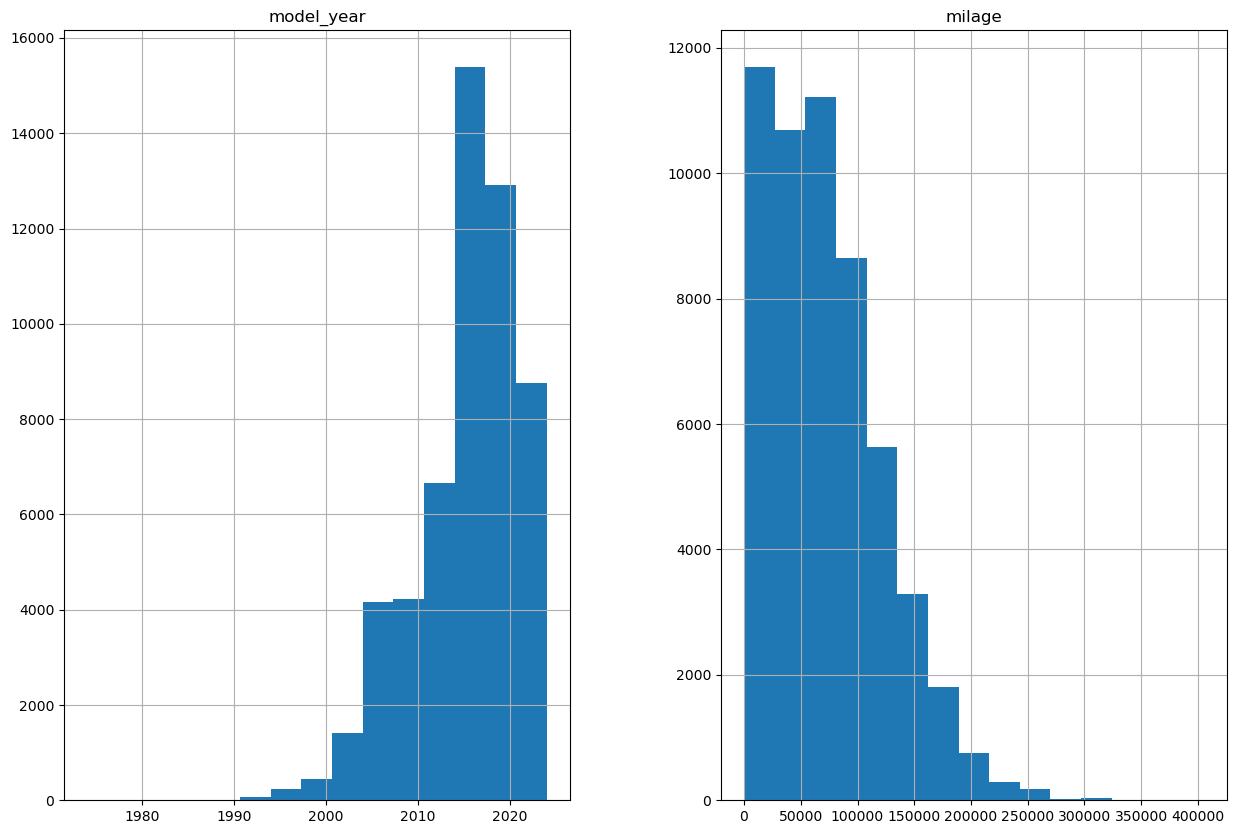

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
numerical_cols = ['model_year','milage']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.show()

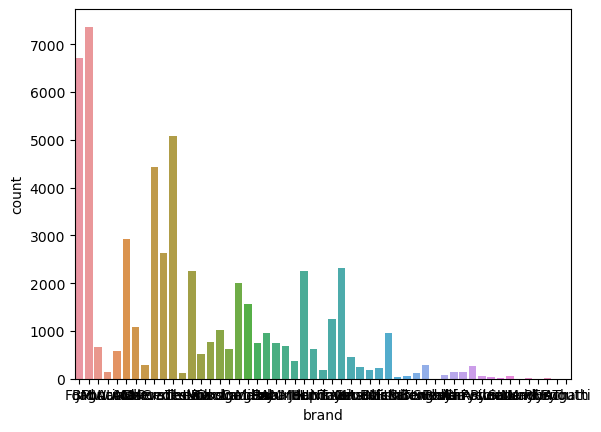

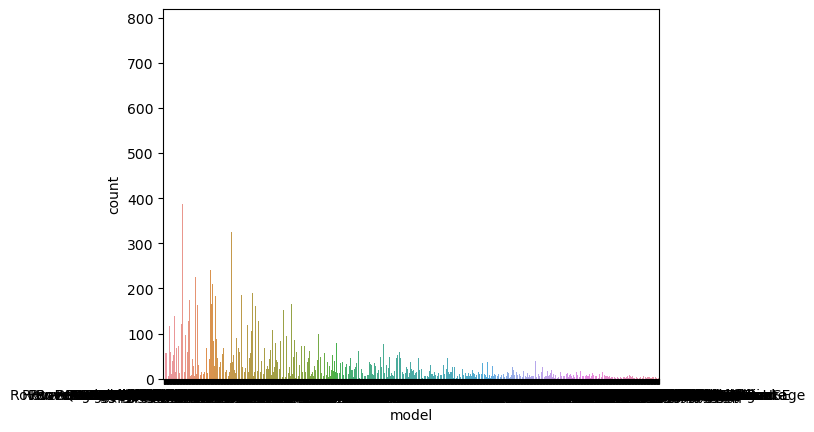

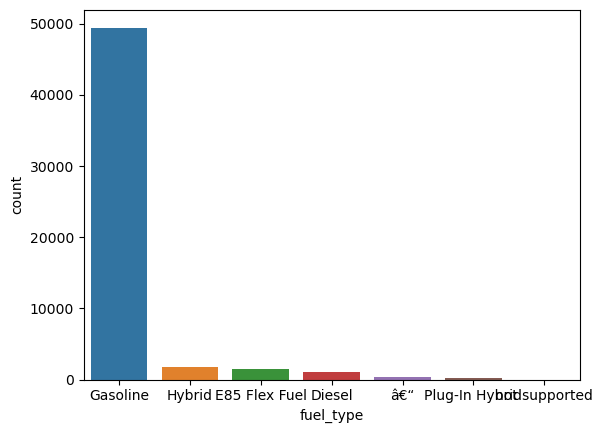

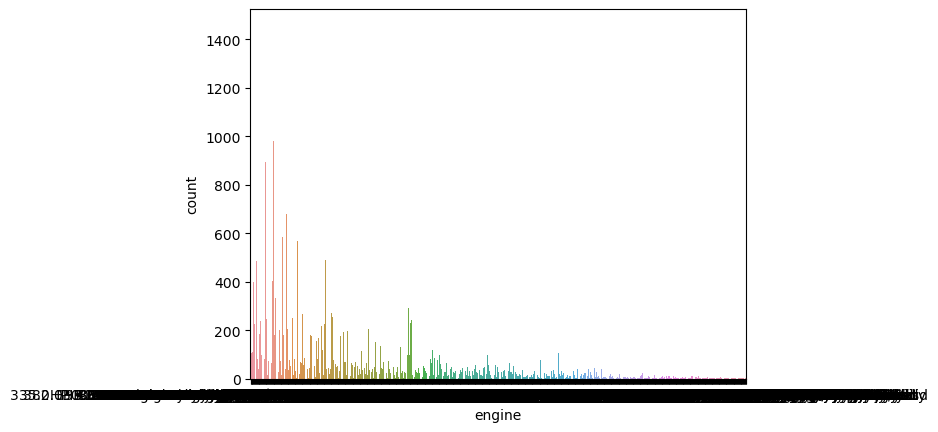

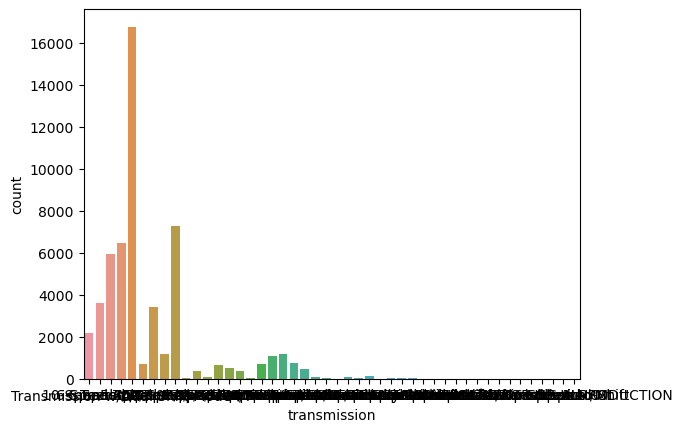

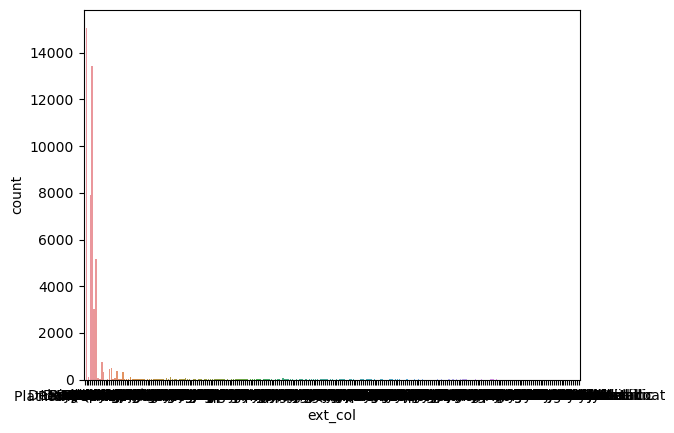

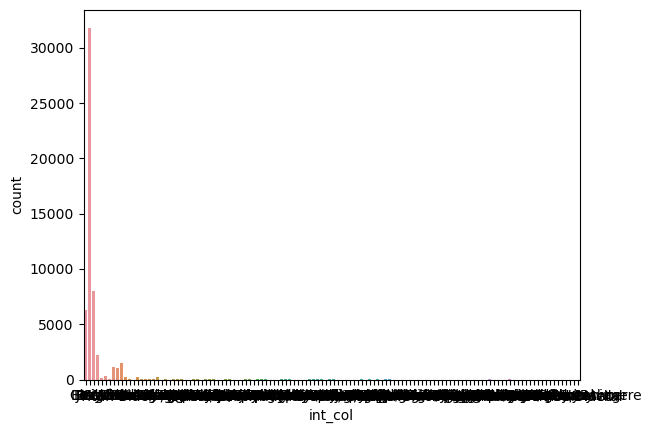

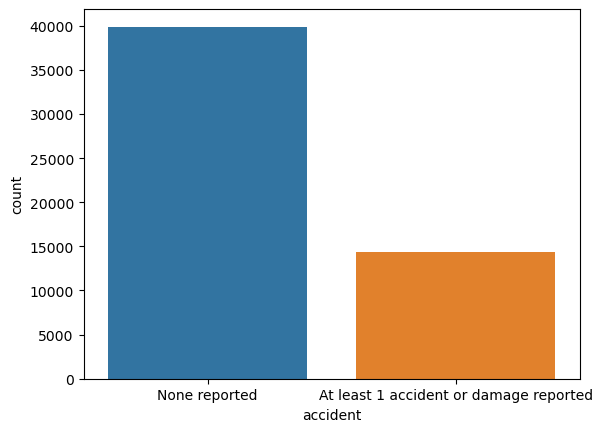

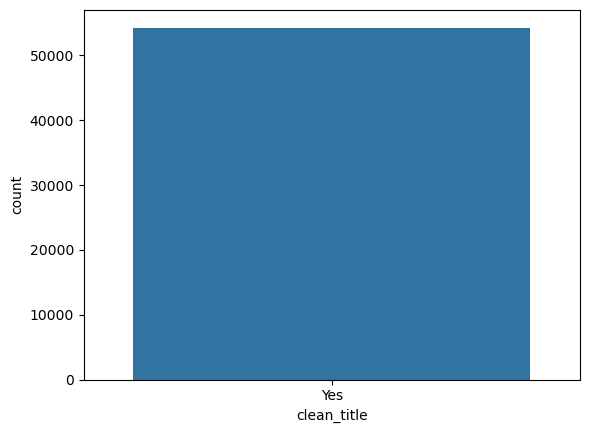

In [18]:
# Bar plot for categorical variables
categorical_cols = ['brand','model','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()

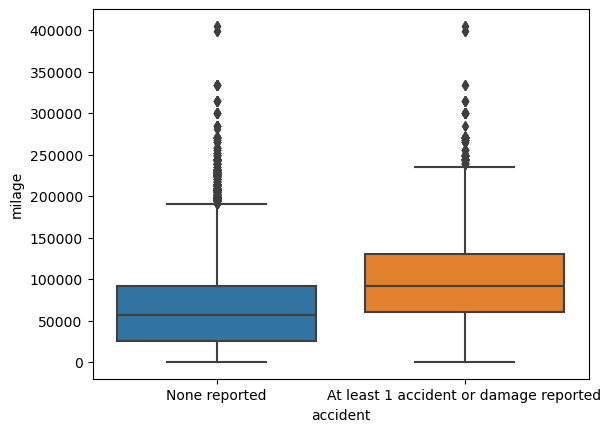

In [19]:
# Box plot for loan amount by loan grade
sns.boxplot(x='accident', y='milage', data=df)
plt.show()

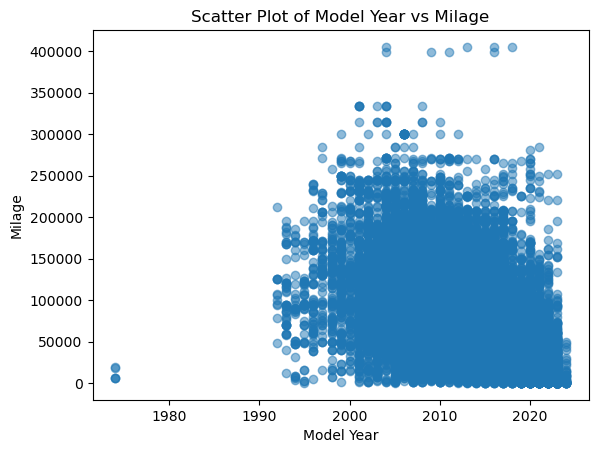

In [20]:
# Create scatter plot with custom sizes and colors
# Extracting 'model_year' and 'milage' for scatter plot
x = df['model_year']
y = df['milage']

# Create scatter plot
plt.scatter(x, y, alpha=0.5)

# Adding titles and labels
plt.title('Scatter Plot of Model Year vs Milage')
plt.xlabel('Model Year')
plt.ylabel('Milage')

# Show the plot
plt.show()

In [21]:
import sweetviz as sv

# Generate the report
report = sv.analyze(df)
report.show_html('car_price_prediction_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report car_price_prediction_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Feature Engineering

In [22]:
# Define categorical and numerical columns
categorical_cols = ['brand','model','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']
numerical_cols = ['model_year','milage']

In [23]:
#Step 1:Missing value imputation ( checking missing values)
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [24]:
#Step 2:Outlier removal (capping) 
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Assume df is your original DataFrame
 
# Identify numerical columns
numerical_cols = ['model_year','milage']
 
# Initialize the scaler
scaler = StandardScaler()
 
# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
 
# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)
 
# Merge scaled numerical columns back into the original DataFrame
df[numerical_cols] = scaled_numerical_df
 
# If needed, print the resulting DataFrame
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,0.520325,0.031759,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,-1.447877,0.143728,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,-1.090022,0.371412,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,1.236035,-1.393115,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,-2.521442,0.757966,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
5,Acura,Integra LS,-2.163587,1.030530,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Beige,At least 1 accident or damage reported,Yes,4995
6,Audi,S5 3.0T Prestige,-0.195385,0.686239,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Black,None reported,Yes,26500
7,GMC,Acadia SLT-1,0.699252,-0.424937,Gasoline,193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,25500
8,Audi,A3 2.0T Tech Premium,0.162470,0.299111,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,None reported,Yes,13999
9,Acura,MDX Technology,-1.447877,1.575696,Gasoline,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Beige,At least 1 accident or damage reported,Yes,6700


In [25]:
#now checking if it is scaled and capped
df.describe().round(3)

,model_year,milage,price
count,54273.000,54273.000,54273.000
mean,0.004,-0.005,39218.443
std,0.987,0.983,72826.336
min,-3.000,-1.439,2000.000
25%,-0.553,-0.802,15500.000
50%,0.162,-0.132,28000.000
75%,0.699,0.580,45000.000
max,1.594,3.000,2954083.000


In [26]:
#Step 3: convert categorical into numerical by ordinal and one hot encoding
# Apply One-Hot Encoding for 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
df.head(10)

,model_year,milage,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,...,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_â€“,accident_None reported
0,0.520325,0.031759,11000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.447877,0.143728,8250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.090022,0.371412,15000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.236035,-1.393115,63500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-2.521442,0.757966,7850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,-2.163587,1.030530,4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.195385,0.686239,26500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.699252,-0.424937,25500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.162470,0.299111,13999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-1.447877,1.575696,6700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.columns

Index(['model_year', 'milage', 'price', 'brand_Alfa', 'brand_Aston',
       'brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Bugatti',
       'brand_Buick',
       ...
       'int_col_Titan Black / Quarzit', 'int_col_Tupelo',
       'int_col_Very Light Cashmere', 'int_col_Walnut',
       'int_col_Whisper Beige', 'int_col_White', 'int_col_White / Brown',
       'int_col_Yellow', 'int_col_â€“', 'accident_None reported'],
      dtype='object', length=3375)

In [29]:
df.dtypes

model_year                float64
milage                    float64
price                       int64
brand_Alfa                float64
brand_Aston               float64
                           ...   
int_col_White             float64
int_col_White / Brown     float64
int_col_Yellow            float64
int_col_â€“               float64
accident_None reported    float64
Length: 3375, dtype: object

In [30]:
#Feature creation
# Define the current year
current_year = 2024

# Calculate the age of the car
df['car_age'] = current_year - df['model_year']
df.head()

,model_year,milage,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,...,int_col_Tupelo,int_col_Very Light Cashmere,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_â€“,accident_None reported,car_age
0,0.520325,0.031759,11000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2023.479675
1,-1.447877,0.143728,8250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2025.447877
2,-1.090022,0.371412,15000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2025.090022
3,1.236035,-1.393115,63500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022.763965
4,-2.521442,0.757966,7850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2026.521442


In [31]:
#Feature Selection
# Calculate correlation coefficients between numerical features and the target variable
numerical_features = ['model_year','milage','car_age']
correlations = df[numerical_features + ['price']].corr()['price'].sort_values()
correlations

milage       -0.252528
car_age      -0.218323
model_year    0.218323
price         1.000000
Name: price, dtype: float64

In [32]:
# # Calculate Information Value (IV) for categorical columns
# import pandas as pd
# import numpy as np

# # Function to calculate IV with handling for division by zero
# def calculate_iv(df, feature, target):
#     lst = []
#     unique_values = df[feature].unique()
#     for val in unique_values:
#         all_count = df[df[feature] == val].shape[0]
#         good_count = df[(df[feature] == val) & (df[target] == 0)].shape[0]
#         bad_count = df[(df[feature] == val) & (df[target] == 1)].shape[0]
#         lst.append({
#             'Value': val,
#             'All': all_count,
#             'Good': good_count,
#             'Bad': bad_count
#         })
#     iv_df = pd.DataFrame(lst)
#     iv_df['Share'] = iv_df['All'] / iv_df['All'].sum()
#     iv_df['Bad Rate'] = iv_df['Bad'] / iv_df['All']
#     iv_df['Good Rate'] = iv_df['Good'] / iv_df['All']
    
#     # Add a small constant to avoid division by zero
#     epsilon = 1e-10
#     iv_df['Bad Rate'] = iv_df['Bad Rate'].replace(0, epsilon)
#     iv_df['Good Rate'] = iv_df['Good Rate'].replace(0, epsilon)
    
#     iv_df['WOE'] = np.log(iv_df['Good Rate'] / iv_df['Bad Rate'])
#     iv_df['IV'] = (iv_df['Good Rate'] - iv_df['Bad Rate']) * iv_df['WOE']
#     iv = iv_df['IV'].sum()
#     return iv

# # Sample DataFrame for demonstration (replace this with your actual DataFrame)
# # df = pd.read_csv('your_data.csv') # Use this line to load your data

# # Identifying the target column
# target_column = 'price'

# # Calculating IV for each feature
# print("\nInformation Value (IV) for categorical features:")
# for feature in df.columns:
#     if feature != target_column:  # Skip the target column
#         iv = calculate_iv(df, feature, target_column)
#         print(f"{feature}: {iv}")


Model Building

In [33]:
# Define features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model evaluation

In [34]:
# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return r2, adj_r2, mape, rmse, mae

In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_r2, lr_adj_r2, lr_mape, lr_rmse, lr_mae = evaluate_model(lr, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_r2, dt_adj_r2, dt_mape, dt_rmse, dt_mae = evaluate_model(dt, X_test, y_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_r2, rf_adj_r2, rf_mape, rf_rmse, rf_mae = evaluate_model(rf, X_test, y_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_r2, xgb_adj_r2, xgb_mape, xgb_rmse, xgb_mae = evaluate_model(xgb_model, X_test, y_test)
# Print evaluation metrics
print(f"Linear Regression: R2={lr_r2}, Adjusted R2={lr_adj_r2}, MAPE={lr_mape}, RMSE={lr_rmse}, MAE={lr_mae}")
print(f"Decision Tree: R2={dt_r2}, Adjusted R2={dt_adj_r2}, MAPE={dt_mape}, RMSE={dt_rmse}, MAE={dt_mae}")
print(f"Random Forest: R2={rf_r2}, Adjusted R2={rf_adj_r2}, MAPE={rf_mape}, RMSE={rf_rmse}, MAE={rf_mae}")
print(f"XGBoost: R2={xgb_r2}, Adjusted R2={xgb_adj_r2}, MAPE={xgb_mape}, RMSE={xgb_rmse}, MAE={xgb_mae}")

Linear Regression: R2=-14494.478077739443, Adjusted R2=-18285.136570872142, MAPE=1905.2962058008936, RMSE=8091968.731894224, MAE=383678.0260410269
Decision Tree: R2=-0.6303497216988871, Adjusted R2=-1.0566964062435753, MAPE=62.92134078993875, RMSE=85817.98459298082, MAE=22059.332821520697
Random Forest: R2=-0.09498896380497368, Adjusted R2=-0.3813354501556465, MAPE=50.967057134916914, RMSE=70330.35267787556, MAE=17823.61404127257
XGBoost: R2=0.055666388074851025, Adjusted R2=-0.19128277822356643, MAPE=55.14748946144907, RMSE=65313.15274357999, MAE=17262.906454772536


Model Selection i.e. XGBoost

In [36]:
from sklearn.model_selection import cross_val_score, KFold

# Cross-validation for XGBoost
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='r2')
print(f"XGBoost Cross-Validated R2 Scores: {xgb_cv_scores.mean()}")

XGBoost Cross-Validated R2 Scores: -0.05972433547281408


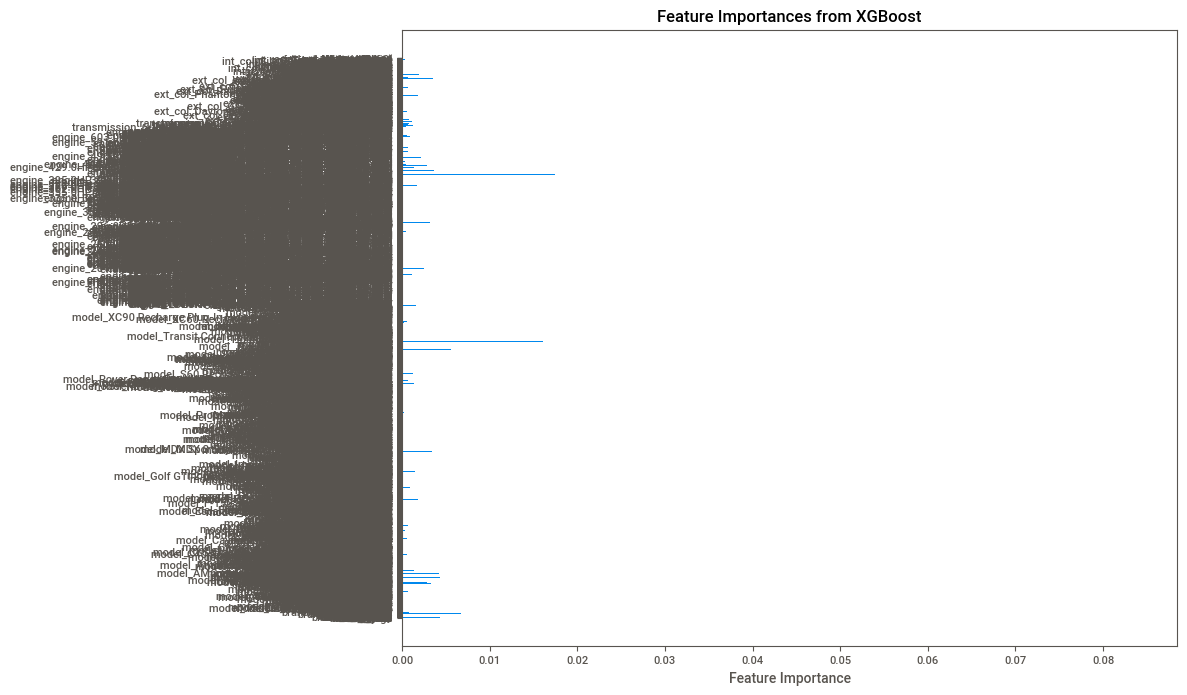

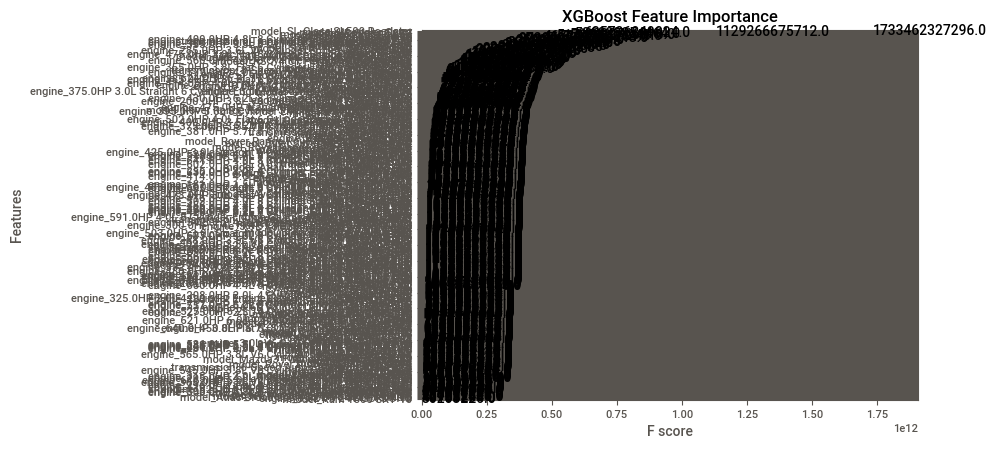

In [37]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns, importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from XGBoost')
plt.show()

# Alternatively, using XGBoost's built-in plot function
xgb.plot_importance(xgb_model, importance_type='gain')
plt.title('XGBoost Feature Importance')
plt.show()

Prediction for Unknown data

In [38]:
import pandas as pd

# Define the path to the dataset
dataset_path = (r'/Users/binodrai/Desktop/projects/car/car_dataset_prediction.csv')

# Load the dataset into a pandas DataFrame
df_predict = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
df_predict.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,0,BMW,Firebird Base,2002,22000,Diesel,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Blue,Gray,None reported,No
1,1,Ford,Camry,2022,49712,Hybrid,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Purple,Black,None reported,Yes
2,2,Acura,Camry,2020,18962,Diesel,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Purple,Beige,At least 1 accident or damage reported,No
3,3,Pontiac,Integra LS,2001,156984,Diesel,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Green,Gray,None reported,No
4,4,Pontiac,Civic,2007,18815,Hybrid,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Gray,Gray,None reported,No
5,5,Jaguar,C-Class,2002,178002,Diesel,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Green,Beige,At least 1 accident or damage reported,No
6,6,BMW,Civic,2001,62657,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,10-Speed A/T,Green,Brown,None reported,No
7,7,Toyota,C-Class,2010,106847,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Brown,At least 1 accident or damage reported,Yes
8,8,BMW,S5 3.0T Prestige,2002,32427,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes
9,9,Honda,Firebird Base,2016,150336,Diesel,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Red,Gray,None reported,No


In [39]:
df_predict = df_predict.drop(columns=['id'])
df_predict.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,BMW,Firebird Base,2002,22000,Diesel,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Blue,Gray,None reported,No
1,Ford,Camry,2022,49712,Hybrid,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Purple,Black,None reported,Yes
2,Acura,Camry,2020,18962,Diesel,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Purple,Beige,At least 1 accident or damage reported,No
3,Pontiac,Integra LS,2001,156984,Diesel,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Green,Gray,None reported,No
4,Pontiac,Civic,2007,18815,Hybrid,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Gray,Gray,None reported,No


In [40]:
# Fill missing values with median for numerical columns
df_predict.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume df_predict is your original DataFrame

# Identify numerical columns
numerical_cols = df_predict.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df_predict[numerical_cols]), columns=numerical_cols)

# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)

# Merge scaled numerical columns back into the original DataFrame
df_predict[numerical_cols] = scaled_numerical_df

# If needed, print the resulting DataFrame
df_predict.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,BMW,Firebird Base,-1.233623,-1.278419,Diesel,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Blue,Gray,None reported,No
1,Ford,Camry,1.786261,-0.799962,Hybrid,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Purple,Black,None reported,Yes
2,Acura,Camry,1.484273,-1.330872,Diesel,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Purple,Beige,At least 1 accident or damage reported,No
3,Pontiac,Integra LS,-1.384617,1.052128,Diesel,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Green,Gray,None reported,No
4,Pontiac,Civic,-0.478652,-1.333410,Hybrid,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Gray,Gray,None reported,No
5,Jaguar,C-Class,-1.233623,1.415012,Diesel,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Green,Beige,At least 1 accident or damage reported,No
6,BMW,Civic,-1.384617,-0.576461,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,10-Speed A/T,Green,Brown,None reported,No
7,Toyota,C-Class,-0.025669,0.186495,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Brown,At least 1 accident or damage reported,Yes
8,BMW,S5 3.0T Prestige,-1.233623,-1.098393,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes
9,Honda,Firebird Base,0.880296,0.937348,Diesel,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Red,Gray,None reported,No


In [42]:
# Define categorical columns
categorical_cols = ['brand','model','fuel_type','engine	transmission','ext_col','int_col','accident','clean_title']
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df_predict is your DataFrame

# Identify categorical columns
categorical_cols = df_predict.select_dtypes(exclude=['number']).columns

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df_predict[categorical_cols]), 
                                   columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df_predict = df_predict.drop(columns=categorical_cols)

# Concatenate the encoded categorical columns back into the DataFrame
df_predict = pd.concat([df_predict, encoded_categorical], axis=1)

# If needed, print the resulting DataFrame
df_predict.head(10)

/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,model_year,milage,brand_Audi,brand_BMW,brand_Chevrolet,brand_Ford,brand_Honda,brand_Jaguar,brand_Mercedes-Benz,brand_Pontiac,...,ext_col_Gray,ext_col_Green,ext_col_Purple,ext_col_Red,ext_col_White,int_col_Black,int_col_Brown,int_col_Gray,accident_None reported,clean_title_Yes
0,-1.233623,-1.278419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.786261,-0.799962,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.484273,-1.330872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.384617,1.052128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.478652,-1.333410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,-1.233623,1.415012,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-1.384617,-0.576461,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,-0.025669,0.186495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,-1.233623,-1.098393,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
9,0.880296,0.937348,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [43]:
#Feature creation
# Define the current year
current_year = 2024

# Calculate the age of the car
df_predict['car_age'] = current_year - df_predict['model_year']
df_predict.head()

,model_year,milage,brand_Audi,brand_BMW,brand_Chevrolet,brand_Ford,brand_Honda,brand_Jaguar,brand_Mercedes-Benz,brand_Pontiac,...,ext_col_Green,ext_col_Purple,ext_col_Red,ext_col_White,int_col_Black,int_col_Brown,int_col_Gray,accident_None reported,clean_title_Yes,car_age
0,-1.233623,-1.278419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2025.233623
1,1.786261,-0.799962,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2022.213739
2,1.484273,-1.330872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.515727
3,-1.384617,1.052128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2025.384617
4,-0.478652,-1.333410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2024.478652


In [45]:
# Assuming you have your trained xgb_model and df_predict

# Get feature names from the trained model
feature_names = xgb_model.get_booster().feature_names

# Check columns in df_predict
predict_columns = df_predict.columns.tolist()
missing_in_predict = set(feature_names) - set(predict_columns)
extra_in_predict = set(predict_columns) - set(feature_names)

# Drop extra columns
df_predict = df_predict.drop(columns=extra_in_predict)

# Convert the set to a list
missing_in_predict_list = list(missing_in_predict)

# Create missing columns DataFrame
missing_columns_df = pd.DataFrame(0, index=df_predict.index, columns=missing_in_predict_list)

# Concatenate to df_predict
df_predict = pd.concat([df_predict, missing_columns_df], axis=1)

# Ensure the correct order of columns
df_predict = df_predict[feature_names]

# Make predictions
df_predict['price'] = xgb_model.predict(df_predict)

In [46]:
df_predict.head()

,model_year,milage,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,...,int_col_Very Light Cashmere,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_â€“,accident_None reported,car_age,price
0,-1.233623,-1.278419,0,0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,2025.233623,62011.074219
1,1.786261,-0.799962,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,2022.213739,61284.921875
2,1.484273,-1.330872,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2022.515727,64762.250000
3,-1.384617,1.052128,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,2025.384617,13166.977539
4,-0.478652,-1.333410,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,2024.478652,57981.933594
